In [11]:
import numpy as np

# Given points
points = np.array([[1.2, 0.8], [-0.6, -1.3], [-0.8, 0.2], [0.2, 0.3]])

# Initial centroids
centroid_c1 = points[0]  # A
centroid_c2 = points[2]  # C

# Maximum number of iterations
max_iterations = 100

for _ in range(max_iterations):
    # Assign points to clusters
    distances_c1 = np.linalg.norm(points - centroid_c1, axis=1)
    distances_c2 = np.linalg.norm(points - centroid_c2, axis=1)

    # Update cluster assignments
    cluster_c1 = points[distances_c1 < distances_c2]
    cluster_c2 = points[distances_c1 >= distances_c2]

    # Update centroids
    new_centroid_c1 = np.mean(cluster_c1, axis=0)
    new_centroid_c2 = np.mean(cluster_c2, axis=0)

    # Check for convergence
    if np.array_equal(new_centroid_c1, centroid_c1) and np.array_equal(new_centroid_c2, centroid_c2):
        break

    # Update centroids for the next iteration
    centroid_c1 = new_centroid_c1
    centroid_c2 = new_centroid_c2

# Print final cluster assignments
print("Cluster C1:", cluster_c1)
print("Cluster C2:", cluster_c2)


Cluster C1: [[1.2 0.8]]
Cluster C2: [[-0.6 -1.3]
 [-0.8  0.2]
 [ 0.2  0.3]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


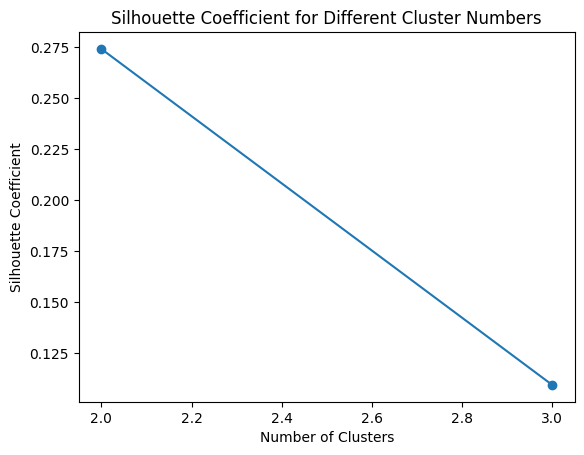

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans

# Given points
points = np.array([[1.2, 0.8], [-0.6, -1.3], [-0.8, 0.2], [0.2, 0.3]])

# Number of clusters to try
n_clusters_range = range(2, min(len(points), 6))  # Adjust the upper limit based on your needs

# Calculate Silhouette Coefficients for different cluster numbers
silhouette_scores = []

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(points)
    silhouette_avg = silhouette_samples(points, cluster_labels).mean()
    silhouette_scores.append(silhouette_avg)

# Visualize Silhouette Coefficients
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.title('Silhouette Coefficient for Different Cluster Numbers')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()


c) Silhouettes can be used to assess the appropriate number of clusters in a dataset. Negative value means that the object is poorly assigned to its cluster and is closer to other clusters. The silhouette coefficient is a quantitative measure of the separation and cohesion of clusters.

### Task 2

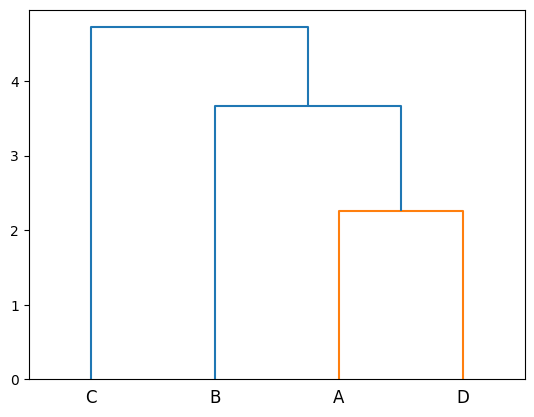

In [13]:
#a)import pandas as pd
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
import pandas as pd

# Load the distance matrix from the CSV file
df = pd.read_csv('distancematrix.csv', delimiter = ";",index_col=0)
df = df.combine_first(df.T)
dist_matrix = squareform(df.values)

# Perform hierarchical clustering using average linkage
linkage_matrix = hierarchy.average(dist_matrix)

# Draw the dendrogram
dendrogram = hierarchy.dendrogram(linkage_matrix, labels=df.index)

# Show the dendrogram
plt.show()


b) For the  partitioning methods, the number of clusters is predetermined. The data points are iteratively rearranged between clusters until a certain convergence criterion is reached.

For hierarchical methods, the number of clusters is not predetermined, and the linkage method is used to calculate the similarity between groups.

c) In hard clustering, an instance is assigned to
exactly one cluster.

In soft clustering, an instance is assigned to a
cluster with a certain probability.

d) Density-based clustering techniques are used when the clusters in the data exhibit varying densities (arbitray shapes).

Pros: it can handle irregular shapes (no pre-defined clusters) and is robust to noise.

Cons: It is sensitive to parameters.